### Gun Violence In America
Import the gun law by state metrics into python and build radar charts by state

Import packages and data

In [65]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

Check data

In [22]:
df = pd.read_csv('State_Laws_Metrics.csv')
df.describe()

,Safety Score
count,459.000000
mean,0.274510
std,0.444303
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [23]:
df.head()

,State,Subject/Law,Long Guns,Hand Guns,Safety Score
0,Alabama,Permit required to purchase?,No,No,0.0
1,Alabama,Firearm registration?,No,No,0.0
2,Alabama,Assault weapon law?,No,No,0.0
3,Alabama,Magazine capacity restriction?,No,No,0.0
4,Alabama,Owner license required?,No,No,0.0


Pivot the data?

In [135]:
df_pivot = df.pivot_table(values='Safety Score', index='State', columns='Subject/Law', aggfunc= 'sum',
                     margins = True, margins_name='Gun safety ranking')
df_pivot.head()

Subject/Law,Assault weapon law?,Background checks required for private sales?,Firearm registration?,Magazine capacity restriction?,NFA weapons restricted?,Open carry allowed?,Owner license required?,Permit required for concealed carry?,Permit required for open carry?,Permit required to purchase?,Gun safety ranking
State,,,,,,,,,,,
Alabama,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
Alaska,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
Arizona,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
Arkansas,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
California,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,NaN,0.5,7.5


In [154]:
# Rename the existing DataFrame
df_pivot.rename(columns={'Assault weapon law?': 'A W L?', 
                   'Background checks required for private sales?': 'B C?',
                  'Firearm registration?': 'F R?',
                  'Magazine capacity restriction?': 'M C R?',
                  'NFA weapons restricted?': 'NFA?',
                  'Open carry allowed?': 'O C?',
                  'Owner license required?': 'O L?',
                  'Permit required for concealed carry?': 'C C P?',
                  'Permit required for open carry?': 'O C P?',
                  'Permit required to purchase?': 'P P?',
                  }, inplace=True)

df_pivot.head()

Subject/Law,A W L?,B C?,F R?,M C R?,NFA?,O C?,O L?,C C P?,O C P?,P P?,Gun safety ranking
State,,,,,,,,,,,
Alabama,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
Alaska,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
Arizona,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
Arkansas,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
California,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,NaN,0.5,7.5


In [168]:
df_index = df_pivot.reset_index(level=0)
df_unpivot = pd.melt(df_index, id_vars='State', value_vars=['A W L?','B C?','F R?','M C R?','NFA?',
                                                            'O C?','O L?','C C P?','O C P?','P P?'])
df_unpivot

,State,Subject/Law,value
0,Alabama,A W L?,0.0
1,Alaska,A W L?,0.0
2,Arizona,A W L?,0.0
3,Arkansas,A W L?,0.0
4,California,A W L?,1.0
...,...,...,...
515,Washington,P P?,0.0
516,West Virginia,P P?,0.0
517,Wisconsin,P P?,1.0
518,Wyoming,P P?,0.0


In [173]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_AL = df_unpivot.loc[df_unpivot['State'] == 'Alabama']
df_AK = df_unpivot.loc[df_unpivot['State'] == 'Alaska']
df_AZ = df_unpivot.loc[df_unpivot['State'] == 'Arizona']
df_AR = df_unpivot.loc[df_unpivot['State'] == 'Arkansas']
df_CA = df_unpivot.loc[df_unpivot['State'] == 'California']
df_CO = df_unpivot.loc[df_unpivot['State'] == 'Colorado']
df_CT = df_unpivot.loc[df_unpivot['State'] == 'Connecticut']
df_DE = df_unpivot.loc[df_unpivot['State'] == 'Delaware']
df_FL = df_unpivot.loc[df_unpivot['State'] == 'Florida']
df_GA = df_unpivot.loc[df_unpivot['State'] == 'Georgia']
df_HI = df_unpivot.loc[df_unpivot['State'] == 'Hawaii']
df_ID = df_unpivot.loc[df_unpivot['State'] == 'Idaho']
df_IL = df_unpivot.loc[df_unpivot['State'] == 'Illinois']
df_IN = df_unpivot.loc[df_unpivot['State'] == 'Indiana']
df_IA = df_unpivot.loc[df_unpivot['State'] == 'Iowa']
df_KS = df_unpivot.loc[df_unpivot['State'] == 'Kansas']
df_KY = df_unpivot.loc[df_unpivot['State'] == 'Kentucky']
df_LA = df_unpivot.loc[df_unpivot['State'] == 'Louisiana']
df_ME = df_unpivot.loc[df_unpivot['State'] == 'Maine']
df_MD = df_unpivot.loc[df_unpivot['State'] == 'Maryland']
df_MA = df_unpivot.loc[df_unpivot['State'] == 'Massachusetts']
df_MI = df_unpivot.loc[df_unpivot['State'] == 'Michigan']
df_MN = df_unpivot.loc[df_unpivot['State'] == 'Minnesota']
df_MS = df_unpivot.loc[df_unpivot['State'] == 'Mississippi']
df_MO = df_unpivot.loc[df_unpivot['State'] == 'Missouri']
df_MT = df_unpivot.loc[df_unpivot['State'] == 'Montana']
df_NE = df_unpivot.loc[df_unpivot['State'] == 'Nebraska']
df_NV = df_unpivot.loc[df_unpivot['State'] == 'Nevada']
df_NH = df_unpivot.loc[df_unpivot['State'] == 'New Hampshire']
df_NJ = df_unpivot.loc[df_unpivot['State'] == 'New Jersey']
df_NM = df_unpivot.loc[df_unpivot['State'] == 'New Mexico']
df_NY = df_unpivot.loc[df_unpivot['State'] == 'New York']
df_NC = df_unpivot.loc[df_unpivot['State'] == 'North Carolina']
df_ND = df_unpivot.loc[df_unpivot['State'] == 'North Dakota']
df_OH = df_unpivot.loc[df_unpivot['State'] == 'Ohio']
df_OK = df_unpivot.loc[df_unpivot['State'] == 'Oklahoma']
df_OR = df_unpivot.loc[df_unpivot['State'] == 'Oregon']
df_PA = df_unpivot.loc[df_unpivot['State'] == 'Pennsylvania']
df_RI = df_unpivot.loc[df_unpivot['State'] == 'Rhode Island']
df_SC = df_unpivot.loc[df_unpivot['State'] == 'South Carolina']
df_SD = df_unpivot.loc[df_unpivot['State'] == 'South Dakota']
df_TN = df_unpivot.loc[df_unpivot['State'] == 'Tennessee']
df_TX = df_unpivot.loc[df_unpivot['State'] == 'Texas']
df_UT = df_unpivot.loc[df_unpivot['State'] == 'Utah']
df_VT = df_unpivot.loc[df_unpivot['State'] == 'Vermont']
df_VA = df_unpivot.loc[df_unpivot['State'] == 'Virginia']
df_WA = df_unpivot.loc[df_unpivot['State'] == 'Washington']
df_WV = df_unpivot.loc[df_unpivot['State'] == 'West Virginia']
df_WI = df_unpivot.loc[df_unpivot['State'] == 'Wisconsin']
df_WY = df_unpivot.loc[df_unpivot['State'] == 'Wyoming']

fig = make_subplots(rows=2, cols=4, subplot_titles=('Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 
                                                     'Colorado', 'Connecticut', 'Delaware',)
                    , specs=[[{'type': 'polar'}]*4]*2)
            

fig.add_trace(go.Scatterpolar(
        name = "Alabama",
        theta=df_AL['Subject/Law'],
        r=df_AL['value']
        ), 1, 1)
fig.add_trace(go.Scatterpolar(
        name = "Alaska",
        theta=df_AK['Subject/Law'],
        r=df_AK['value']
        ), 1, 2)
fig.add_trace(go.Scatterpolar(
        name = "Arizona",
        theta=df_AZ['Subject/Law'],
        r=df_AZ['value']
        ), 1, 3)
fig.add_trace(go.Scatterpolar(
        name = "Arkansas",
        theta=df_AR['Subject/Law'],
        r=df_AR['value']
        ), 1, 4)
fig.add_trace(go.Scatterpolar(
        name = "California",
        theta=df_CA['Subject/Law'],
        r=df_CA['value']
        ), 2, 1)
fig.add_trace(go.Scatterpolar(
        name = "Colorado",
        theta=df_CO['Subject/Law'],
        r=df_CO['value']
        ), 2, 2)
fig.add_trace(go.Scatterpolar(
        name = "Connecticut",
        theta=df_CT['Subject/Law'],
        r=df_CT['value']
        ), 2, 3)
fig.add_trace(go.Scatterpolar(
        name = "Delaware",
        theta=df_DE['Subject/Law'],
        r=df_DE['value']
        ), 2, 4)

fig.update_traces(fill='toself')

fig.update_layout(title_text="Gun Laws By State")

fig.show()

In [171]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = make_subplots(rows=10, cols=5, subplot_titles=('Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 
                                                     'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                                                     'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 
                                                     'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                                                     'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
                                                     'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
                                                     'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
                                                     'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
                                                     'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 
                                                     'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'), 
                    specs=[[{'type': 'polar'}]*5]*10)
            

            

fig.add_trace(go.Scatterpolar(
        name = "Alabama",
        theta=df_AL['Subject/Law'],
        r=df_AL['value']
        ), 1, 1)
fig.add_trace(go.Scatterpolar(
        name = "Alaska",
        theta=df_AK['Subject/Law'],
        r=df_AK['value']
        ), 1, 2)
fig.add_trace(go.Scatterpolar(
        name = "Arizona",
        theta=df_AZ['Subject/Law'],
        r=df_AZ['value']
        ), 1, 3)
fig.add_trace(go.Scatterpolar(
        name = "Arkansas",
        theta=df_AR['Subject/Law'],
        r=df_AR['value']
        ), 1, 4)
fig.add_trace(go.Scatterpolar(
        name = "California",
        theta=df_CA['Subject/Law'],
        r=df_CA['value']
        ), 1, 5)
fig.add_trace(go.Scatterpolar(
        name = "Colorado",
        theta=df_CO['Subject/Law'],
        r=df_CO['value']
        ), 2, 1)
fig.add_trace(go.Scatterpolar(
        name = "Connecticut",
        theta=df_CT['Subject/Law'],
        r=df_CT['value']
        ), 2, 2)
fig.add_trace(go.Scatterpolar(
        name = "Delaware",
        theta=df_DE['Subject/Law'],
        r=df_DE['value']
        ), 2, 3)
fig.add_trace(go.Scatterpolar(
        name = "Florida",
        theta=df_FL['Subject/Law'],
        r=df_FL['value']
        ), 2, 4)
fig.add_trace(go.Scatterpolar(
        name = "Georgia",
        theta=df_GA['Subject/Law'],
        r=df_GA['value']
        ), 2, 5)
fig.add_trace(go.Scatterpolar(
        name = "Hawaii",
        theta=df_HI['Subject/Law'],
        r=df_HI['value']
        ), 3, 1)
fig.add_trace(go.Scatterpolar(
        name = "Idaho",
        theta=df_ID['Subject/Law'],
        r=df_ID['value']
        ), 3, 2)
fig.add_trace(go.Scatterpolar(
        name = "Illinois",
        theta=df_IL['Subject/Law'],
        r=df_IL['value']
        ), 3, 3)
fig.add_trace(go.Scatterpolar(
        name = "Indiana",
        theta=df_IN['Subject/Law'],
        r=df_IN['value']
        ), 3, 4)
fig.add_trace(go.Scatterpolar(
        name = "Iowa",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 3, 5)
fig.add_trace(go.Scatterpolar(
        name = "Alabama",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 4, 1)
fig.add_trace(go.Scatterpolar(
        name = "Alaska",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 4, 2)
fig.add_trace(go.Scatterpolar(
        name = "Arizona",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 4, 3)
fig.add_trace(go.Scatterpolar(
        name = "Arkansas",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 4, 4)
fig.add_trace(go.Scatterpolar(
        name = "Arkansas",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 4, 5)
fig.add_trace(go.Scatterpolar(
        name = "Alabama",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 5, 1)
fig.add_trace(go.Scatterpolar(
        name = "Alaska",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 5, 2)
fig.add_trace(go.Scatterpolar(
        name = "Arizona",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 5, 3)
fig.add_trace(go.Scatterpolar(
        name = "Arkansas",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 5, 4)
fig.add_trace(go.Scatterpolar(
        name = "Arkansas",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 5, 5)
fig.add_trace(go.Scatterpolar(
        name = "Alabama",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 6, 1)
fig.add_trace(go.Scatterpolar(
        name = "Alaska",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 6, 2)
fig.add_trace(go.Scatterpolar(
        name = "Arizona",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 6, 3)
fig.add_trace(go.Scatterpolar(
        name = "Arkansas",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 6, 4)
fig.add_trace(go.Scatterpolar(
        name = "Arkansas",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 6, 5)
fig.add_trace(go.Scatterpolar(
        name = "Alabama",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 7, 1)
fig.add_trace(go.Scatterpolar(
        name = "Alaska",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 7, 2)
fig.add_trace(go.Scatterpolar(
        name = "Arizona",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 7, 3)
fig.add_trace(go.Scatterpolar(
        name = "Arkansas",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 7, 4)
fig.add_trace(go.Scatterpolar(
        name = "Arkansas",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 7, 5)
fig.add_trace(go.Scatterpolar(
        name = "Alabama",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 8, 1)
fig.add_trace(go.Scatterpolar(
        name = "Alaska",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 8, 2)
fig.add_trace(go.Scatterpolar(
        name = "Arizona",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 8, 3)
fig.add_trace(go.Scatterpolar(
        name = "Arkansas",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 8, 4)
fig.add_trace(go.Scatterpolar(
        name = "Arkansas",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 8, 5)
fig.add_trace(go.Scatterpolar(
        name = "Alabama",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 9, 1)
fig.add_trace(go.Scatterpolar(
        name = "Alaska",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 9, 2)
fig.add_trace(go.Scatterpolar(
        name = "Arizona",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 9, 3)
fig.add_trace(go.Scatterpolar(
        name = "Arkansas",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 9, 4)
fig.add_trace(go.Scatterpolar(
        name = "Arkansas",
        theta=df_IA['Subject/Law'],
        r=df_IA['value']
        ), 9, 5)
fig.add_trace(go.Scatterpolar(
        name = "Virginia",
         theta=df_VA['Subject/Law'],
        r=df_VA['value']
        ), 10, 1)
fig.add_trace(go.Scatterpolar(
        name = "Washington",
        theta=df_WA['Subject/Law'],
        r=df_WA['value']
        ), 10, 2)
fig.add_trace(go.Scatterpolar(
        name = "Virginia",
        theta=df_WV['Subject/Law'],
        r=df_WV['value']
        ), 10, 3)
fig.add_trace(go.Scatterpolar(
        name = "Wisconsin",
        theta=df_WI['Subject/Law'],
        r=df_WI['value']
        ), 10, 4)
fig.add_trace(go.Scatterpolar(
        name = "Wyoming",
        theta=df_WY['Subject/Law'],
        r=df_WY['value']
        ), 10, 5)

fig.update_traces(fill='toself')

fig.update_layout(title_text="Gun Laws By State")

fig.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Sample data
data = {
    df['Subject/Law']: [10, 20, 30],
    "Variable2": [15, 25, 35],
    "Variable3": [20, 30, 40],
    "Variable4": [30, 40, 50],
    "Variable5": [35, 45, 55],
    "Variable6": [40, 50, 60],
    "Variable7": [45, 55, 65],
    "Variable8": [50, 60, 70],
    "Variable9": [55, 65, 75]
}
df = pd.DataFrame(data)

# Plot the radar charts
fig = px.line_polar(df, r="Variable1", theta=df.columns[1:], line_close=True)

# Add multiple subplots to the figure
for i in range(1, df.shape[1]):
    fig.add_trace(px.line_polar(df, r=df.columns[i], theta=df.columns[1:], line_close=True))

# Show the plot
fig.show()

In [6]:
df2 = pd.read_csv('everytownresearch-massshootings.csv')
df2.head()

,Date,City,State,Latitude,Longitude,Total shot,Number killed,Number wounded,Assault weapon OR high-capacity magazine,Prohibited shooter,Killed intimate partner or family,Dangerous warning signs,Narrative,Last updated
0,2009-01-27,Wilmington,CA,33.783263,-118.254934,6,6,0,No,No,Yes,No,A shooter fatally shot his wife and their five...,2023-01-20T19:50:14.000Z
1,2009-02-14,Brockport,NY,43.221000,-77.943000,5,4,1,No,No,No,Yes,A shooter fatally shot a nurse in the parking ...,2023-01-20T19:50:14.000Z
2,2009-03-05,Cleveland,OH,41.477464,-81.686514,6,5,1,No,Yes,Yes,No,A shooter fatally shot his wife and four of he...,2023-01-20T19:50:14.000Z
3,2009-03-10,Coffee and Geneva County,AL,31.112900,-86.045900,14,10,4,Yes,No,Yes,No,A shooter killed 10 people and injured four in...,2021-06-02T14:41:58.000Z
4,2009-03-15,Miami,FL,25.737781,-80.259580,4,4,0,Yes,No,Yes,No,"At a birthday party, a shooter fatally shot hi...",2021-06-02T14:41:58.000Z


In [44]:
states = {
            'AL': 'Alabama',
            'AK': 'Alaska',
            'AZ': 'Arizona',
            'AR': 'Arkansas',
            'CA': 'California',
            'CO': 'Colorado',
            'CT': 'Connecticut',
            'DE': 'Delaware',
            'FL': 'Florida',
            'GA': 'Georgia',
            'HI': 'Hawaii',
            'ID': 'Idaho',
            'IL': 'Illinois',
            'IN': 'Indiana',
            'IA': 'Iowa',
            'KS': 'Kansas',
            'KY': 'Kentucky',
            'LA': 'Louisiana',
            'ME': 'Maine',
            'MD': 'Maryland',
            'MA': 'Massachusetts',
            'MI': 'Michigan',
            'MN': 'Minnesota',
            'MS': 'Mississippi',
            'MO': 'Missouri',
            'MT': 'Montana',
            'NE': 'Nebraska',
            'NV': 'Nevada',
            'NH': 'New Hampshire',
            'NJ': 'New Jersey',
            'NM': 'New Mexico',
            'NY': 'New York',
            'NC': 'North Carolina',
            'ND': 'North Dakota',
            'OH': 'Ohio',
            'OK': 'Oklahoma',
            'OR': 'Oregon',
            'PA': 'Pennsylvania',
            'RI': 'Rhode Island',
            'SC': 'South Carolina',
            'SD': 'South Dakota',
            'TN': 'Tennessee',
            'TX': 'Texas',
            'UT': 'Utah',
            'VT': 'Vermont',
            'VA': 'Virginia',
            'WA': 'Washington',
            'WV': 'West Virginia',
            'WI': 'Wisconsin',
            'WY': 'Wyoming',
            'DC': 'District of Columbia',
            'MP': 'Northern Mariana Islands',
            'PW': 'Palau',
            'PR': 'Puerto Rico',
            'VI': 'Virgin Islands',
            'AA': 'Armed Forces Americas (Except Canada)',
            'AE': 'Armed Forces Africa/Canada/Europe/Middle East',
            'AP': 'Armed Forces Pacific'
}
    
states = {state: abbrev for state, abbrev in states.items()}
df2['State'] = df2['State'].replace(states)
df2.head()

,Date,City,State,Latitude,Longitude,Total shot,Number killed,Number wounded,Assault weapon OR high-capacity magazine,Prohibited shooter,Killed intimate partner or family,Dangerous warning signs,Narrative,Last updated
0,2009-01-27,Wilmington,California,33.783263,-118.254934,6,6,0,No,No,Yes,No,A shooter fatally shot his wife and their five...,2023-01-20T19:50:14.000Z
1,2009-02-14,Brockport,New York,43.221000,-77.943000,5,4,1,No,No,No,Yes,A shooter fatally shot a nurse in the parking ...,2023-01-20T19:50:14.000Z
2,2009-03-05,Cleveland,Ohio,41.477464,-81.686514,6,5,1,No,Yes,Yes,No,A shooter fatally shot his wife and four of he...,2023-01-20T19:50:14.000Z
3,2009-03-10,Coffee and Geneva County,Alabama,31.112900,-86.045900,14,10,4,Yes,No,Yes,No,A shooter killed 10 people and injured four in...,2021-06-02T14:41:58.000Z
4,2009-03-15,Miami,Florida,25.737781,-80.259580,4,4,0,Yes,No,Yes,No,"At a birthday party, a shooter fatally shot hi...",2021-06-02T14:41:58.000Z


In [139]:
dff2 = df2.groupby('State')['Total shot'].sum()
dff2.head()

State
Alabama        35
Alaska          4
Arizona        54
Arkansas       13
California    273
Name: Total shot, dtype: int64

In [140]:
left_df = df_pivot
right_df = dff2
merge_df = left_df.merge(right_df, on='State', how='left')
merge_df.head()

,A W L?,B C?,F R?,M C R?,NFA?,O C?,O L?,C C P?,O C P?,P P?,Gun safety ranking,Total shot
State,,,,,,,,,,,,
Alabama,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,35.0
Alaska,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,4.0
Arizona,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,54.0
Arkansas,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,13.0
California,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,NaN,0.5,7.5,273.0


In [141]:
clean_df = merge_df.reset_index(level=0)
clean_df

,State,A W L?,B C?,F R?,M C R?,NFA?,O C?,O L?,C C P?,O C P?,P P?,Gun safety ranking,Total shot
0,Alabama,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,35.0
1,Alaska,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,4.0
2,Arizona,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,54.0
3,Arkansas,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,13.0
4,California,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,NaN,0.5,7.5,273.0
5,Colorado,0.0,1.0,0.0,1.0,0.0,NaN,0.0,1.0,0.0,0.0,3.0,131.0
6,Connecticut,1.0,1.0,0.5,1.0,0.0,NaN,1.0,1.0,1.0,1.0,7.5,39.0
7,Delaware,1.0,1.0,0.0,1.0,1.0,NaN,0.0,1.0,0.0,0.0,5.0,4.0
8,District of Columbia,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,9.0,25.0
9,Florida,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,1.0,224.0


In [62]:
# Plot the scatterplot with plotly
fig = px.scatter(clean_df, x="Gun safety ranking", y="Total shot", color="State", trendline="ols")
fig.update_layout(xaxis_range=[-1,10])

# Show the plot
fig.show()

C:\Users\Chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Gun safety ranking', ylabel='Total shot'>

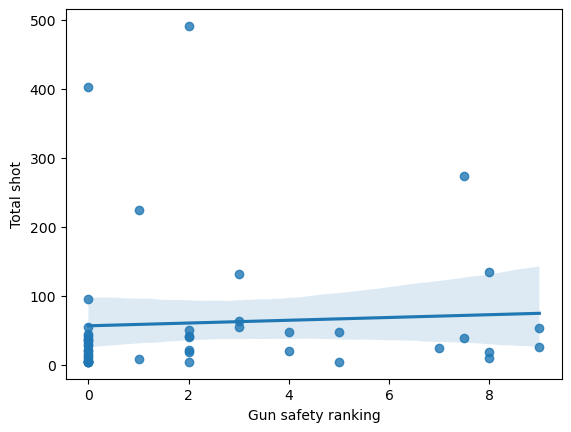

In [82]:
sns.regplot(clean_df['Gun safety ranking'], clean_df['Total shot'])

In [90]:
#Remove outlier states with 0 mass shootings
clean_df2 = clean_df[clean_df['Total shot'].notna()]
clean_df3 = clean_df2[~(clean_df2['Total shot'] <= 10)]  
clean_df3

,State,Asslt weap law?,Bckgrd checks?,Firearm regis?,Mag cap restrict?,NFA weap restrict?,Open carry?,Owner license?,Conceal carry permit?,Open carry permit?,Purch permit?,Gun safety ranking,Total shot
0,Alabama,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,35.0
2,Arizona,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,54.0
3,Arkansas,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,13.0
4,California,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,NaN,0.5,7.5,273.0
5,Colorado,0.0,1.0,0.0,1.0,0.0,NaN,0.0,1.0,0.0,0.0,3.0,131.0
6,Connecticut,1.0,1.0,0.5,1.0,0.0,NaN,1.0,1.0,1.0,1.0,7.5,39.0
8,District of Columbia,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,9.0,25.0
9,Florida,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,1.0,224.0
10,Georgia,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,42.0
13,Illinois,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,8.0,135.0


In [93]:
# Plot the scatterplot with plotly
fig = px.scatter(clean_df3, x="Total shot", y="Gun safety ranking", color="State", trendline="ols")
fig.update_layout(yaxis_range=[-1,10])

# Show the plot
fig.show()

C:\Users\Chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Gun safety ranking', ylabel='Total shot'>

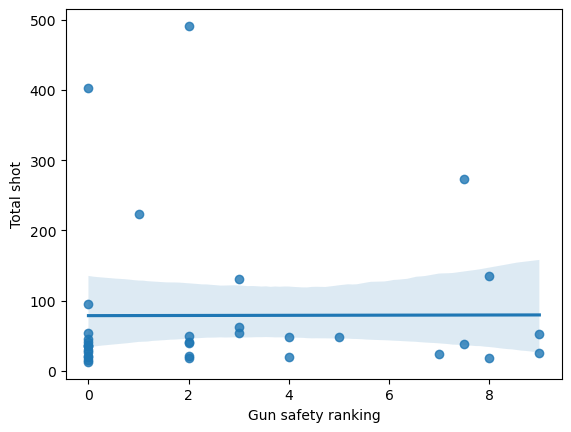

In [92]:
sns.regplot(clean_df3['Gun safety ranking'], clean_df3['Total shot'])

In [69]:
df3 = pd.read_csv('NST-EST2022-ALLDATA.csv')
df3.head()

,SUMLEV,REGION,DIVISION,STATEID,State,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NPOPCHG_2020,...,RDEATH2021,RDEATH2022,RNATURALCHG2021,RNATURALCHG2022,RINTERNATIONALMIG2021,RINTERNATIONALMIG2022,RDOMESTICMIG2021,RDOMESTICMIG2022,RNETMIG2021,RNETMIG2022
0,10,0,0,0,United States,331449520,331511512,332031554,333287557,61992,...,10.363828,10.350218,0.434073,0.736729,1.133397,3.038912,0.000000,0.000000,1.133397,3.038912
1,20,1,0,0,Northeast Region,57609156,57448898,57259257,57040406,-160258,...,9.780142,9.868918,0.206629,0.511200,1.402708,3.752662,-4.855348,-8.061896,-3.452640,-4.309234
2,30,1,1,0,New England,15116206,15074473,15121745,15129548,-41733,...,9.530598,9.887115,-0.310502,-0.206669,1.770752,4.655140,1.546021,-3.767839,3.316773,0.887301
3,30,1,2,0,Middle Atlantic,42492950,42374425,42137512,41910858,-118525,...,9.869304,9.862369,0.391400,0.769581,1.271205,3.427836,-7.142565,-9.607444,-5.871360,-6.179608
4,20,2,0,0,Midwest Region,68985537,68961043,68836505,68787595,-24494,...,11.059195,11.169148,-0.207043,-0.125530,0.802714,2.111084,-2.645374,-2.529339,-1.842660,-0.418255


In [71]:
dff3 = df3.groupby('State')['POPESTIMATE2022'].sum()
dff3.head()

State
Alabama        5074296
Alaska          733583
Arizona        7359197
Arkansas       3045637
California    39029342
Name: POPESTIMATE2022, dtype: int64

In [79]:
left_df2 = clean_df
right_df2 = dff3
merge_df2 = left_df2.merge(right_df2, on='State', how='left')
merge_df2.head()

,State,Asslt weap law?,Bckgrd checks?,Firearm regis?,Mag cap restrict?,NFA weap restrict?,Open carry?,Owner license?,Conceal carry permit?,Open carry permit?,Purch permit?,Gun safety ranking,Total shot,POPESTIMATE2022
0,Alabama,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,35.0,5074296.0
1,Alaska,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,4.0,733583.0
2,Arizona,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,54.0,7359197.0
3,Arkansas,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,13.0,3045637.0
4,California,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,NaN,0.5,7.5,273.0,39029342.0


In [80]:
merge_df2['Total shot / 2022 state pop'] = merge_df2['Total shot'] / merge_df2['POPESTIMATE2022'] * 100
merge_df2

,State,Asslt weap law?,Bckgrd checks?,Firearm regis?,Mag cap restrict?,NFA weap restrict?,Open carry?,Owner license?,Conceal carry permit?,Open carry permit?,Purch permit?,Gun safety ranking,Total shot,POPESTIMATE2022,Total shot / 2022 state pop
0,Alabama,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,35.0,5074296.0,0.000690
1,Alaska,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,4.0,733583.0,0.000545
2,Arizona,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,54.0,7359197.0,0.000734
3,Arkansas,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,13.0,3045637.0,0.000427
4,California,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,NaN,0.5,7.5,273.0,39029342.0,0.000699
5,Colorado,0.0,1.0,0.0,1.0,0.0,NaN,0.0,1.0,0.0,0.0,3.0,131.0,5839926.0,0.002243
6,Connecticut,1.0,1.0,0.5,1.0,0.0,NaN,1.0,1.0,1.0,1.0,7.5,39.0,3626205.0,0.001076
7,Delaware,1.0,1.0,0.0,1.0,1.0,NaN,0.0,1.0,0.0,0.0,5.0,4.0,1018396.0,0.000393
8,District of Columbia,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,9.0,25.0,671803.0,0.003721
9,Florida,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,1.0,224.0,22244823.0,0.001007


In [81]:
# Plot the scatterplot with plotly
fig = px.scatter(merge_df2, x="Gun safety ranking", y="Total shot / 2022 state pop", color="State", trendline="ols")
fig.update_layout(xaxis_range=[0,0.002])
fig.update_layout(xaxis_range=[-1,10])

# Show the plot
fig.show()